# 형태학적 변환 팽창 과 침식

- python에서 확장, 침식 실험 예시

OpenCV에서 이것을 어떻게 구현할 수 있는지 봅시다. 두 단계가 있습니다. 우선 이미지를 가져와야
합니다. 그런 다음 커널을 정의해야 합니다.

첫 번째 단계로 입력 이미지를 로드하고 이진 이미지를 만들기 위해 임계값을 지정해야 합니다

OpenCV에서 이것을 어떻게 구현할 수 있는지 봅시다. 두 단계가 있습니다. 우선 이미지를 가져와야
합니다. 그런 다음 커널을 정의해야 합니다.

첫 번째 단계로 입력 이미지를 로드하고 이진 이미지를 만들기 위해 임계값을 지정해야 합니다.

흰색에 가까운 색상은 검은색으로 변하고 회색과 검은색 부
분은 흰색으로 변하는 것을 확인할 수 있습니다.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# image loading and input image -> gray
img = cv2.imread("./Billiards.png", cv2.IMREAD_GRAYSCALE)

In [4]:
# 임계값 연산자의 출력을 마스크 라는 변수에 저장
# 230 보다 작으면 모든 값은 흰색 처리 / 230 보다 큰 모든 값은 검은색 이 됩니다.
_, mask = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

In [5]:
titles = ['image', 'mask']
images = [img, mask]

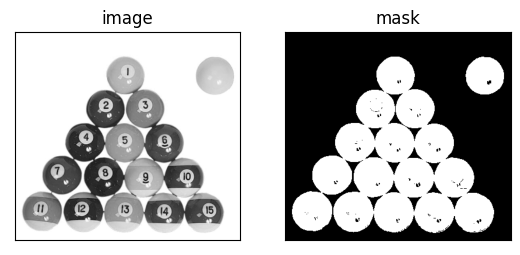

<Figure size 640x480 with 0 Axes>

In [17]:
for i in range(2):
    plt.subplot(1, 2, i+1),
    plt.imshow(images[i], 'gray'),
    plt.title(titles[i]),
    plt.xticks([]),
    plt.yticks([]),
plt.show()
plt.savefig('08.Mask.png')

In [8]:
img_gray = cv2.imread('./Billiards.png', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY_INV)
# 3x3 Kenrnel

In [9]:
kernel = np.ones((3, 3), np.uint8)
print(kernel)
dilation = cv2.dilate(mask, kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [10]:
titles = ['image', 'mask', 'dilation']
images = [img_gray, mask, dilation]

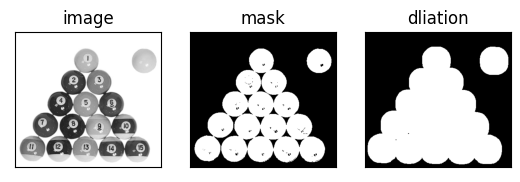

<Figure size 640x480 with 0 Axes>

In [18]:
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()
plt.savefig('08.Mask+dilation.png')


이제 확장된 이미지를 만들고 이를 위해 함수를 사용합니다 cv2.dilate() 함수에 대한 입력은 마스크 이미
지와 커널입니다. 여기서 우리는 커널을 픽셀 크기가 3x3 작은 정사각형으로 정의 할 수 있습니다.
이 이미지의 행렬의 유형은 부호 없는 정수여야 합니다. (unit8)

팽창 결과를 얻었고 흰색 영역이 확장된 것을 볼 수 있습니
다. 확장된 이미지에서 이 작은 검은색 점들이 축소되었습
니다.

팽창을 두 번 이상 적용할 수 있는지 물어보셨을 것입니다. 예, 가능합니다. 이를 위해 반복 횟수라는 매
개 변수를 사용할 수 있습니다. 예를 들어, 이 매개변수를 10으로 설정할 수 있습니다. 이는 확장 프로세
스가 연속적으로 10번 반복됨을 의미합니다. 결과 이미지에서 훨씬 더 많은 검은색 영역이 이미지에서
사라진 반면 흰색 영역은 확장된 것을 볼 수 있습니다.

흰색 영역의 확대를 높이려면 더 큰 커널을 사용할 수 있다
는 점을 기억하는 것이 좋습니다. 예를 들어 5x5 크기의 커
널을 사용하면 확장된 이미지에서 흰색 영역이 훨씬 더
확장됩니다. 

In [13]:
img_gray = cv2.imread('./Billiards.png', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY_INV)

In [15]:
kernel = np.ones((3, 3), np.uint8)
dliation = cv2.dilate(mask, kernel, iterations=5)
titles = ['image', 'mask', 'dliation']
images = [img_gray, mask, dliation]

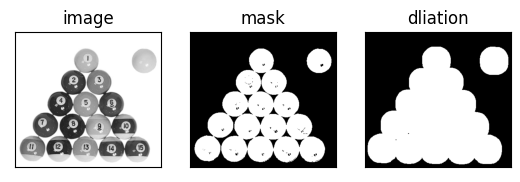

<Figure size 640x480 with 0 Axes>

In [19]:
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()
plt.savefig('08.More dilation.png')


비슷한 방식으로 함수를 사용하여 침식 연산을 적용합니다. Cv2.erode() 이 함수는 함수와 동일한
매개변수를 cv2.dilate() 가집니다.